# Feature Engineering

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]

In [53]:
!gdown "1MwZZb2jRsFKeL8lgqSVn0cuv6eZztzR1"

# Load dataset
movies = pd.read_csv('imdb_dataset.csv')
movies.head(10)

Downloading...
From: https://drive.google.com/uc?id=1MwZZb2jRsFKeL8lgqSVn0cuv6eZztzR1
To: /content/imdb_dataset.csv
100% 92.4k/92.4k [00:00<00:00, 104MB/s]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,NaN,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,NaN,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,NaN,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,NaN,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NaN,Drama,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195.0,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139.0,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


## Missing values

In [54]:
movies.isna().sum()

star_rating        1
title              0
content_rating     1
genre              1
duration          19
actors_list        0
dtype: int64

In [55]:
print(movies.shape)
movies = movies.dropna(subset=['genre', 'duration'])
print(movies.shape)

(979, 6)
(959, 6)


In [56]:
movies.isna().sum()

star_rating       1
title             0
content_rating    1
genre             0
duration          0
actors_list       0
dtype: int64

## Outliers

### Discover with Histogram

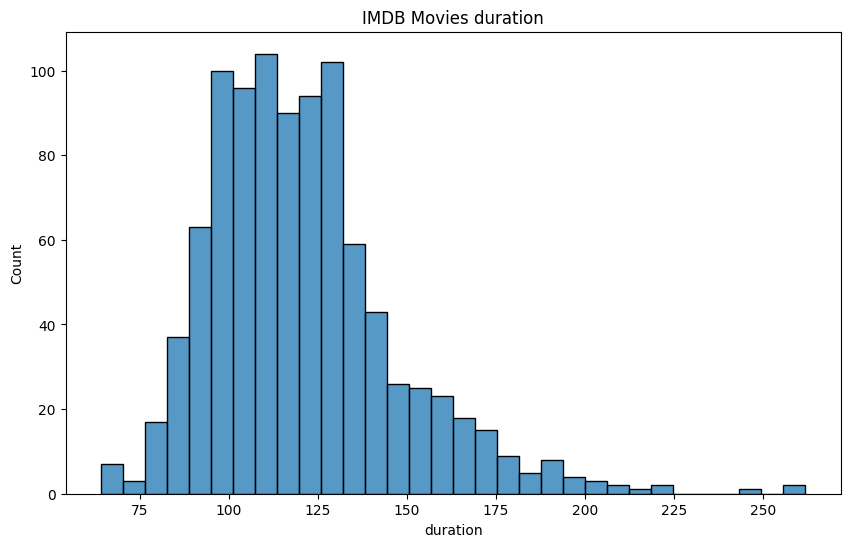

In [57]:
sns.histplot(movies['duration']).set_title('IMDB Movies duration')
plt.show()

### Discover with BoxPlot

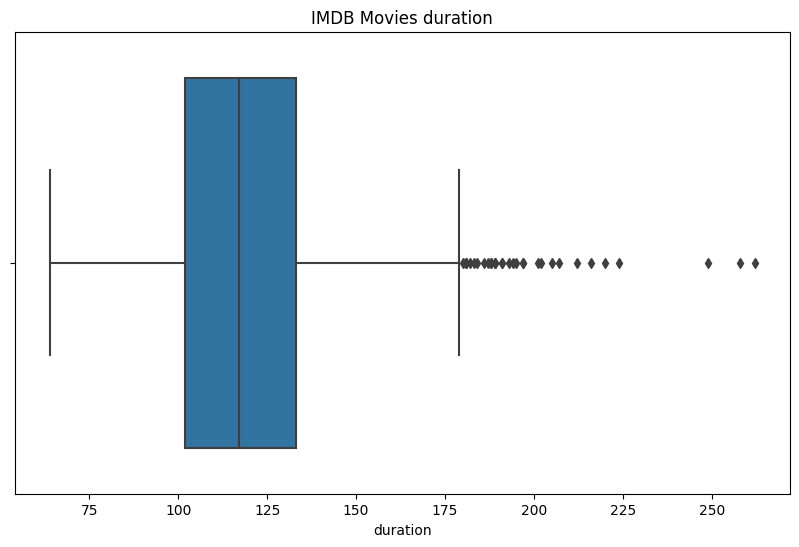

In [58]:
sns.boxplot(data=movies, x='duration').set_title('IMDB Movies duration')
plt.show()

In [59]:
q1 = np.percentile(movies['duration'], 25)
q3 = np.percentile(movies['duration'], 75)
iqr = q3 - q1

q3 + 1.5 * iqr

179.5

In [60]:
mean = movies['duration'].mean()
std = movies['duration'].std()

movies['duration_sigmas'] = (movies['duration'] - mean) / std


In [61]:
movies[
  (movies['duration_sigmas'] > 3) |
  (movies['duration_sigmas'] < -3)
]

,star_rating,title,content_rating,genre,duration,actors_list,duration_sigmas
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894
17,8.7,Seven Samurai,UNRATED,Drama,207.0,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...",3.265061
78,8.4,Once Upon a Time in America,R,Crime,249.0,"[u'Robert De Niro', u'James Woods', u'Elizabet...",4.855229
85,8.4,Lawrence of Arabia,PG,Adventure,216.0,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...",3.605811
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224.0,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",3.908700
157,8.2,Gone with the Wind,G,Drama,258.0,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",5.195979
204,8.1,Ben-Hur,G,Adventure,212.0,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe...",3.454366
445,7.9,The Ten Commandments,APPROVED,Adventure,220.0,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",3.757256
476,7.8,Hamlet,PG-13,Drama,262.0,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",5.347424
630,7.7,Malcolm X,PG-13,Biography,202.0,"[u'Denzel Washington', u'Angela Bassett', u'De...",3.075755


## Categorical Features

In [62]:
movies[['title', 'genre']]

,title,genre
1,The Godfather,Crime
4,Pulp Fiction,Crime
5,12 Angry Men,Drama
6,"The Good, the Bad and the Ugly",Western
7,The Lord of the Rings: The Return of the King,Adventure
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


In [63]:
movies.shape

(959, 7)

In [64]:
movies_dummies = pd.get_dummies(movies, columns=['genre'])
movies_dummies.head()

,star_rating,title,content_rating,duration,actors_list,duration_sigmas,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_History,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_Thriller,genre_Western
1,NaN,The Godfather,R,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",2.053504,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.9,Pulp Fiction,R,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1.258419,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8.9,12 Angry Men,NaN,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",-0.937527,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",1.523448,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8.9,The Lord of the Rings: The Return of the King,PG-13,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Binning

In [65]:
duration_bins = pd.cut(movies['duration'], bins=10)
duration_bins

1      (163.0, 182.8]
4      (143.2, 163.0]
5       (83.8, 103.6]
6      (143.2, 163.0]
7      (182.8, 202.6]
            ...      
974    (103.6, 123.4]
975    (103.6, 123.4]
976    (123.4, 143.2]
977    (103.6, 123.4]
978    (123.4, 143.2]
Name: duration, Length: 959, dtype: category
Categories (10, interval[float64, right]): [(63.802, 83.8] < (83.8, 103.6] < (103.6, 123.4] <
                                            (123.4, 143.2] ... (182.8, 202.6] < (202.6, 222.4] <
                                            (222.4, 242.2] < (242.2, 262.0]]

In [66]:
duration_bins.value_counts()

(103.6, 123.4]    321
(83.8, 103.6]     228
(123.4, 143.2]    226
(143.2, 163.0]     84
(163.0, 182.8]     41
(63.802, 83.8]     32
(182.8, 202.6]     18
(202.6, 222.4]      5
(242.2, 262.0]      3
(222.4, 242.2]      1
Name: duration, dtype: int64

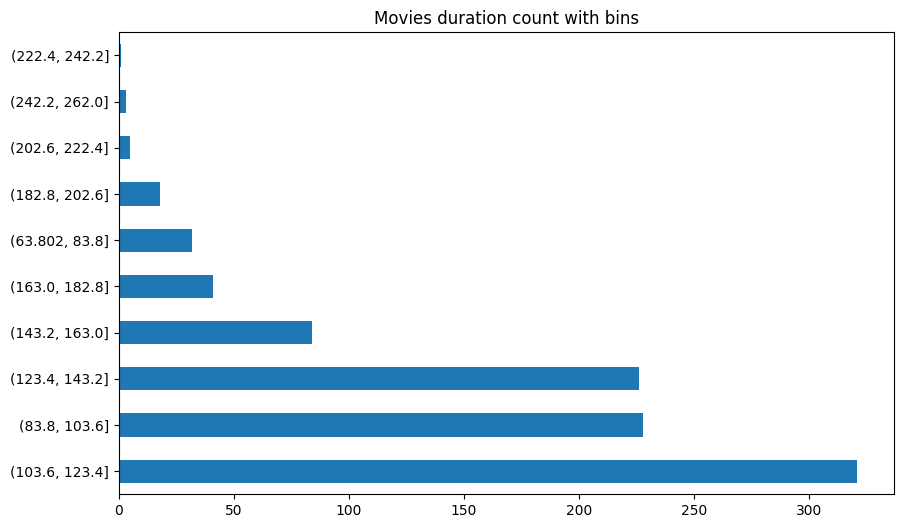

In [67]:
duration_bins.value_counts().plot(kind='barh').set_title('Movies duration count with bins')
plt.show()

## Feature normalization

### Min-Max

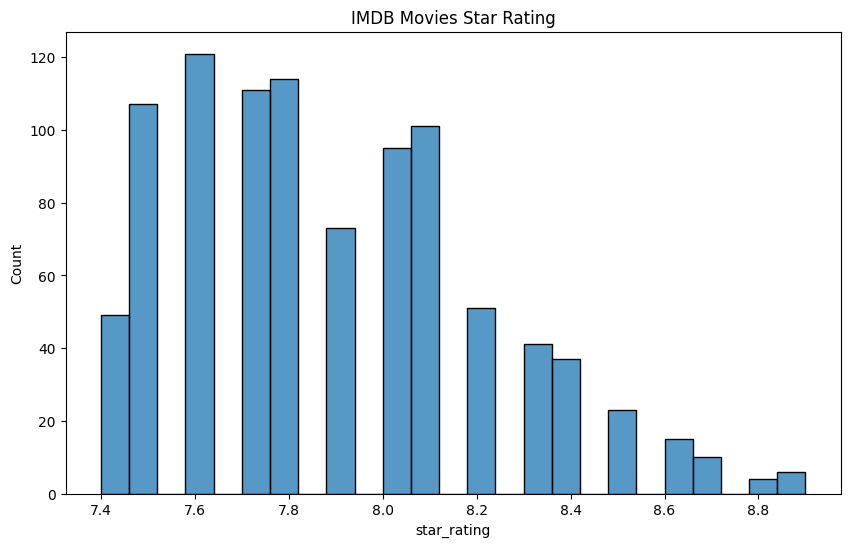

In [68]:
sns.histplot(movies['star_rating'], bins=25).set_title('IMDB Movies Star Rating')
plt.show()

In [69]:
# define the scaler and fit it
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=False)
mm_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

# transform movies['star_rating']
movies['star_rating_min-max'] = mm_scaler.transform(movies['star_rating'].values.reshape(-1, 1))



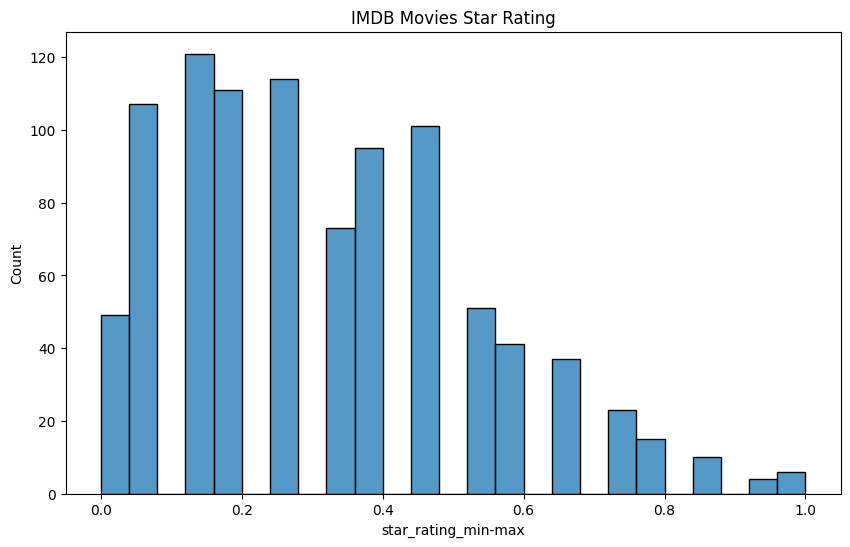

In [70]:
sns.histplot(movies['star_rating_min-max'], bins=25).set_title('IMDB Movies Star Rating')
plt.show()

#### Store to disk

In [71]:
import pickle

# Write to disk using pickle
with open("mm_scaler.pkl", "wb") as f:
  pickle.dump(mm_scaler, f)

# Load later from disk
with open("mm_scaler.pkl", "rb") as f:
  mm_scaler_loaded = pickle.load(f)


In [72]:
# Test both objets output same results
print(mm_scaler_loaded.transform([[7.8]]))
print(mm_scaler.transform([[7.8]]))


[[0.26666667]]
[[0.26666667]]


We can see the data has the same distribution.

Now, what happens if we try to scale data values which are out of our sample distribution but still valid values?

In [73]:
mm_scaler.transform([[3]])

array([[-2.93333333]])

In [74]:
mm_scaler.transform([[5]])

array([[-1.6]])

In [75]:
mm_scaler.transform([[9.3]])

array([[1.26666667]])

What if `clip=True`?

In [76]:
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=True)
mm_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

MinMaxScaler(clip=True)

In [77]:
MinMaxScaler??

In [78]:
mm_scaler.transform([[3]])

array([[0.]])

In [79]:
mm_scaler.transform([[5]])

array([[0.]])

In [80]:
mm_scaler.transform([[9.3]])

array([[1.]])

In [81]:
mm_scaler.transform([[9.5]])

array([[1.]])

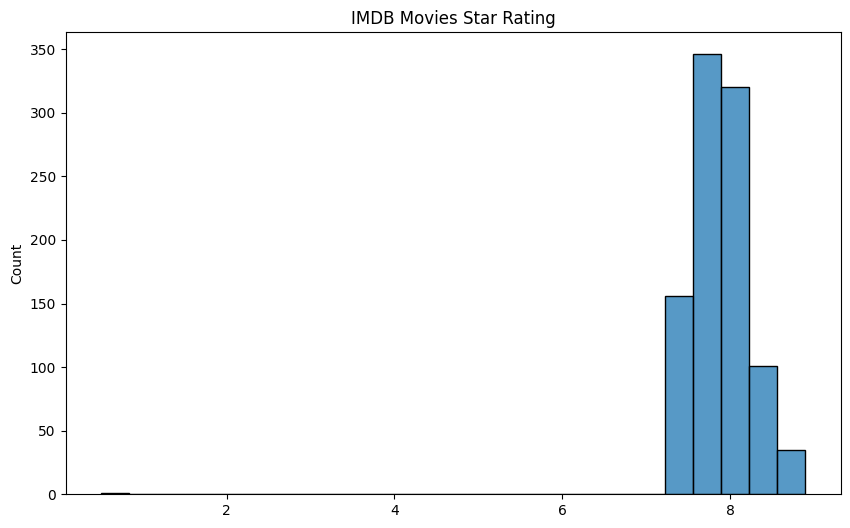

In [82]:
new_star_rating = movies['star_rating'].tolist()
new_star_rating.append(0.5)

sns.histplot(new_star_rating, bins=25).set_title('IMDB Movies Star Rating')
plt.show()

In [83]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
new_star_rating_mm = mm_scaler.fit_transform(np.array(new_star_rating).reshape(-1, 1))


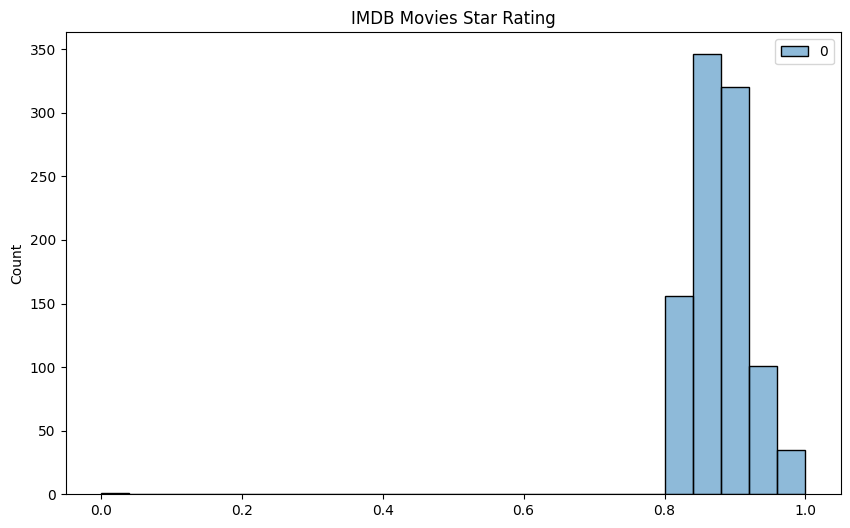

In [84]:
sns.histplot(new_star_rating_mm, bins=25).set_title('IMDB Movies Star Rating')
plt.show()

### Z-Score

In [85]:
movies['star_rating'].describe()

count    958.000000
mean       7.883925
std        0.326874
min        7.400000
25%        7.600000
50%        7.800000
75%        8.100000
max        8.900000
Name: star_rating, dtype: float64

In [86]:
std_scaler = StandardScaler()
std_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

movies['star_rating_std'] = std_scaler.transform(movies['star_rating'].values.reshape(-1, 1))

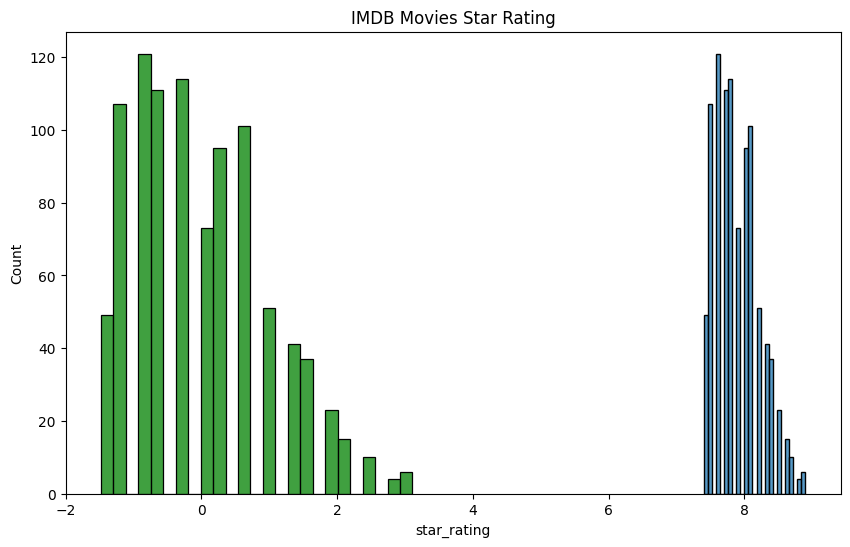

In [87]:
sns.histplot(movies['star_rating'], bins=25)
sns.histplot(movies['star_rating_std'], bins=25, color='g').set_title('IMDB Movies Star Rating')
plt.show()

In [88]:
sr_mean = movies['star_rating'].mean()
sr_std = movies['star_rating'].std()
sr_scaled = (movies['star_rating'] - sr_mean) / sr_std


In [89]:
sr_scaled

1           NaN
4      3.108458
5      3.108458
6      3.108458
7      3.108458
         ...   
974   -1.480461
975   -1.480461
976   -1.480461
977   -1.480461
978   -1.480461
Name: star_rating, Length: 959, dtype: float64

In [90]:
movies['star_rating_std'].iloc[0]

nan

In [91]:
std_scaler.transform([[3]])

array([[-14.94909429]])

In [92]:
(3 - sr_mean) / sr_std

-14.941290009795113

In [93]:
std_scaler.transform([[5]])

array([[-8.82733985]])

In [94]:
std_scaler.transform([[9.5]])

array([[4.94660763]])

In [95]:
std_scaler = StandardScaler()


In [96]:
std_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

StandardScaler()

In [97]:
std_scaler.transform(np.array([2., 8, 10, 20]).reshape(-1, 1))

array([[-18.00997151],
       [  0.3552918 ],
       [  6.47704624],
       [ 37.08581842]])

In [98]:
std_scaler.fit_transform(movies['star_rating'].values.reshape(-1, 1))

array([[        nan],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1

In [99]:
std_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

StandardScaler()

In [100]:
std_scaler.transform(movies['star_rating'].values.reshape(-1, 1))

array([[        nan],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1